In [ ]:
# 모듈 불러오기
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 데이터셋 불러오기
코드를 실행시켜 실습코드와 같이 첨부된 dataset.csv파일을 로드합니다.

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/기계학습 스터디(2024.02)/dataset.csv')

X = data.iloc[:, :2].values.tolist()
y = data.iloc[:, 2].values.tolist()

### 데이터셋 분할 및 시각화
Load 된 데이터셋을 모델 학습과 검증을 위해 Trainset과 Testset으로 랜덤 샘플링하여 나누고 데이터셋이 어떤 분포로 생겼는지 시각화하여 살펴봅니다.

In [ ]:
import random


# 랜덤시드 설정
random.seed(1234)

# 데이터 랜덤 셔플
idx = list(range(len(X)))
random.shuffle(idx)

# 앞 80개 까지는 학습용으로 뒤 20개는 테스트용으로 split
X_train = [X[i] for i in idx[:80]]
y_train = [y[i] for i in idx[:80]]
X_test = [X[i] for i in idx[80:]]
y_test = [y[i] for i in idx[80:]]

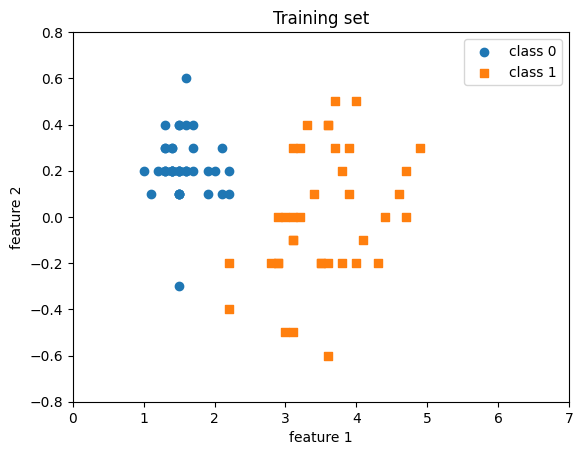

In [ ]:
# 클래스 별로 데이터를 시각화 하여 분포를 살펴보기
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')

plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

### SVM 모델 구현 및 훈련

In [ ]:
svm = SVC(kernel='linear', C=100)
svm.fit(X_train, y_train)

SVC(C=100, kernel='linear')

### 모델 검증
Training set과 Test set각각에서 모델의 accuracy를 계산합니다.

In [ ]:
# Train dataset에서 성능 검증
train_acc = sum(svm.predict(X_train) == y_train) / len(y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

# Test dataset에서 성능 검증
test_acc = sum(svm.predict(X_test) == y_test) / len(y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Train set accuracy: 100.00%
Test set accuracy: 93.75%


### 결정 경계 시각화
train 데이터셋과 test 데이터셋 각각을 이용하여 2개의 scatter plot을 그리고 그 위에 학습된 가중치를 이용하여 결정경계를 시각화합니다.

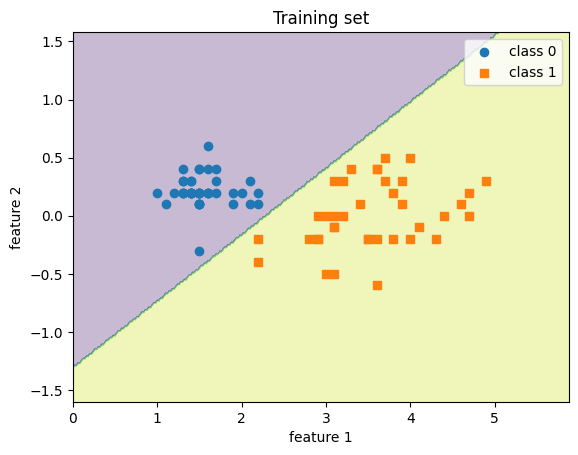

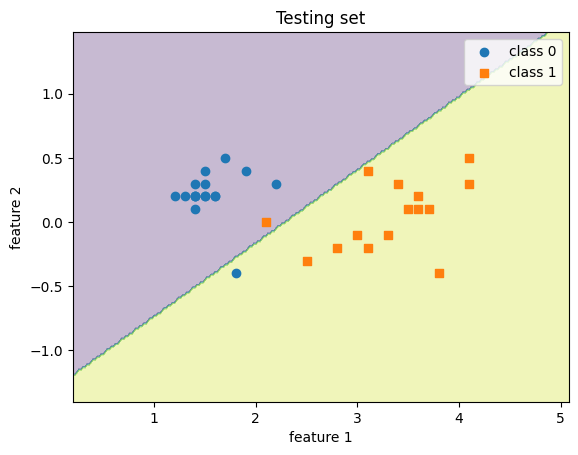

In [ ]:
### 데이터셋에서 Decision Boundary 시각화
X_train = np.array(X_train)
x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

# Decision Boundary를 표시하기 위해
# x1_min부터 x1_max까지 0.02간격으로, x2_min부터 x2_max까지 0.02간격의 모든 점의 좌표를 반환
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))

Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # predict all datapoint from mashgrid
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3) # 범위를 색으로 표시

# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')

# 그래프로 표현
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()


### Test 데이터셋에서 Decision Boundary 시각화
X_test = np.array(X_test)
x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3)

# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 0],
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 0],
            label='class 0', marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            label='class 1', marker='s')
# 그래프로 표현
plt.title('Testing set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

### SOFT MARGIN

위에서 실습한 선형 SVM 모델은 hard margin을 사용했습니다.이번에는 soft margin을 사용하여 학습 및 검증을 진행해 봅니다.

Train set accuracy: 97.50%
Test set accuracy: 96.88%


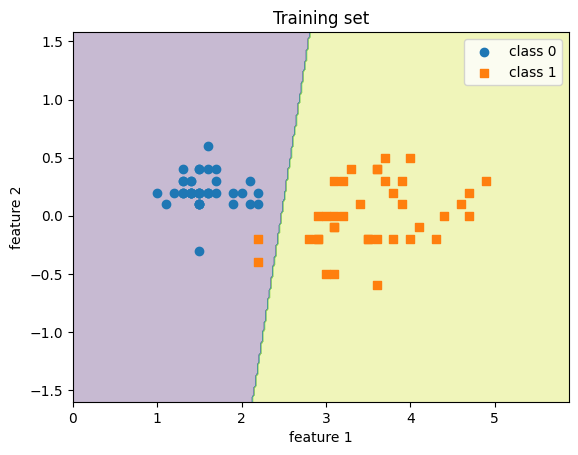

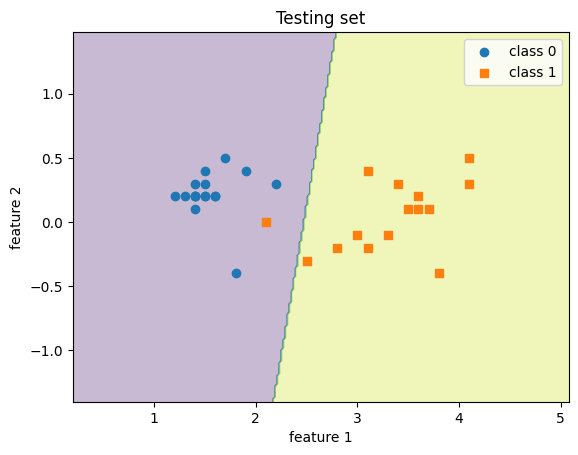

In [ ]:
svm = SVC(kernel='linear', C=0.05)
svm.fit(X_train, y_train)

# Train dataset에서 성능 검증
train_acc = sum(svm.predict(X_train) == y_train) / len(y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))
# Test dataset에서 성능 검증
test_acc = sum(svm.predict(X_test) == y_test) / len(y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

### 데이터셋에서 Decision Boundary 시각화
X_train = np.array(X_train)
x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

# Decision Boundary를 표시하기 위해
# x1_min부터 x1_max까지 0.02간격으로, x2_min부터 x2_max까지 0.02간격의 모든 점의 좌표를 반환
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))

Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # predict all datapoint from mashgrid
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3) # 범위를 색으로 표시

# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')
# 그래프로 표현
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()


### Test 데이터셋에서 Decision Boundary 시각화
X_test = np.array(X_test)
x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3)

# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 0],
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 0],
            label='class 0', marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            label='class 1', marker='s')
# 그래프로 표현
plt.title('Testing set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

---

### 비선형 분류 with SVM

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

### 데이터셋 불러오기

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/기계학습 스터디(2024.02)/xor_dataset.csv')

X = data.iloc[:, :2].values
y = data.iloc[:, 2].astype(int).values

### 데이터셋 분할 및 시각화

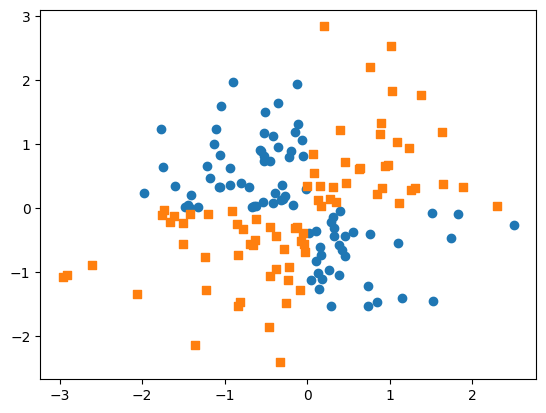

In [ ]:
# 랜덤시드 설정
random.seed(123)

# 데이터 랜덤 셔플
idx = list(range(len(X)))
random.shuffle(idx)

# 앞 160개 까지는 학습용으로 뒤 40개는 테스트용으로 split
X_train = [X[i] for i in idx[:160]]
y_train = [y[i] for i in idx[:160]]
X_test = [X[i] for i in idx[160:]]
y_test = [y[i] for i in idx[160:]]

# 데이터셋 plot
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == -1],
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == -1],
            marker='s')
plt.show()

### 모델 구현 및 검증

비선형 커널을 사용하는 SVM모델을 이용하여 위 데이터셋을 분류하는 분류기를 학습합니다.

- 선형 SVM 모델과 동일하게 SVC 모듈을 사용하지만, 'kernel' 파라미터를 조절하여 비선형 SVM 모델을 구현합니다.

Train set accuracy: 98.12%
Test set accuracy: 92.31%


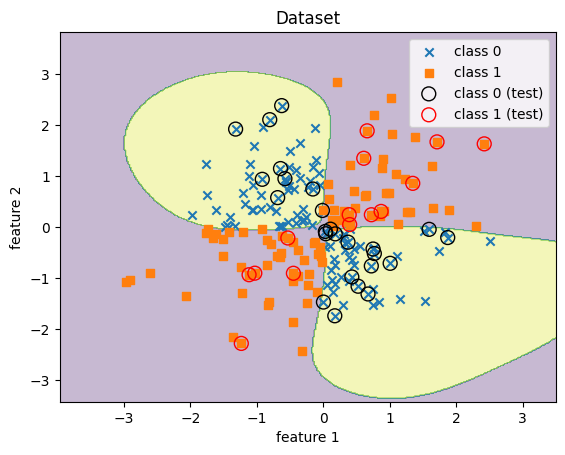

In [ ]:
svm = SVC(kernel='rbf', C=100, gamma='auto')
svm.fit(X_train, y_train)

# Train dataset에서 성능 검증
train_acc = sum(svm.predict(X_train) == y_train) / len(y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

# Test dataset에서 성능 검증
test_acc = sum(svm.predict(X_test) == y_test) / len(y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

### 데이터셋에서 Decision Boundary 시각화
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3)

# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X) if y[idx] == 1],
            [i[1] for idx, i in enumerate(X) if y[idx] == 1],
            label='class 0', marker='x')
plt.scatter([i[0] for idx, i in enumerate(X) if y[idx] == -1],
            [i[1] for idx, i in enumerate(X) if y[idx] == -1],
            label='class 1', marker='s')
## testset 강조
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            label='class 0 (test)', facecolors='none', edgecolor='black', s=100, marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == -1],
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == -1],
            label='class 1 (test)', facecolors='none', edgecolor='red', s=100, marker='o')


# 그래프로 표현
plt.title('Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()